In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video
from mpl_toolkits import mplot3d
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [ ]:
#Geometry
xmin = 0
xmax = 1
dx = 0.01
x = np.arange(xmin,xmax,dx)

#Boundary conditions
v_x0 = -1
v_x1 = 1

#Initial guess
v_old = np.zeros_like(x)
#Setup boundary conditions
v_old[0] = 1
v_old[-1] = -1
#An array to hold our updated guess
v_new = np.zeros_like(v_old)
v_new[0] = v_old[0]
v_new[-1] = v_old[-1]

In [ ]:
fname = 'animation/laplace_converge1.mp4'

fig = plt.figure()
ax = plt.gca()

analplot, = ax.plot(x,-2*x+1,label='true solution')
vplot, = ax.plot([],[],label='numerical estimate')
ax.set_xlabel('x')
ax.set_ylabel('V')
ax.legend()
ax.set_title('N = {}'.format(0))
plt.tight_layout()
def init():
    vplot.set_data([], [])
    return vplot,
def animate(i):
    for n in range(1,v_old.size-1):
        v_new[n] = 0.5 * (v_old[n-1] + v_old[n+1])
    v_old[:] = v_new[:]
    vplot.set_data(x,v_new)
    ax.set_title('N = {}'.format(i))
    return vplot,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=3000, interval=25, blit=True)

anim.save(fname)

In [11]:
x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
xg,yg = np.meshgrid(x,y)
V0 = 1

v_old = np.zeros((x.size,y.size))

v_old[0,:] = V0
v_old[-1,:] = 0
v_new = np.zeros_like(v_old)
v_new[:,:] = v_old[:,:]

/Users/tjwilli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
No handles with labels found to put in legend.


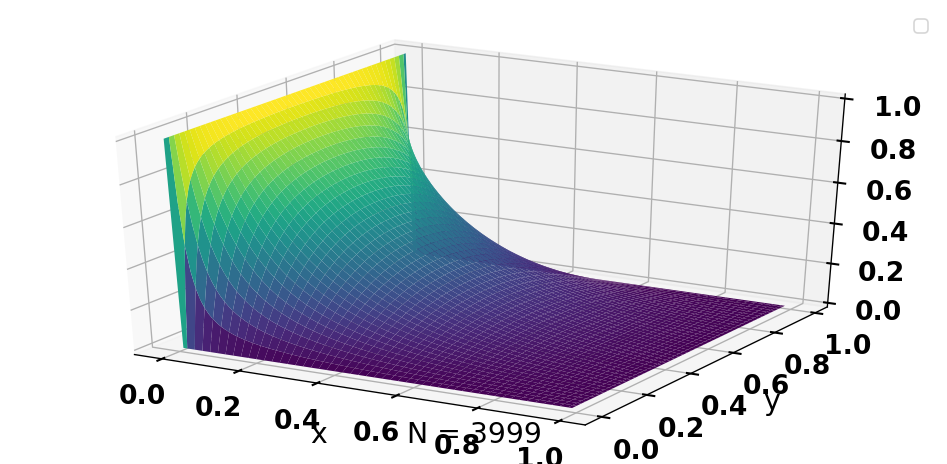

In [12]:
fname = 'animation/laplace_converge2D.mp4'

fig = plt.figure()
ax = plt.gca()

#analplot, = ax.plot(x,-2*x+1,label='true solution')
ax = plt.axes(projection='3d')
surface = ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('N = {}'.format(0))
plt.tight_layout()
def init():
    global surface
    surface.remove()
    surface = ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
    return surface,
def animate(i):
    global surface
    for j in range(1,x.size-1):
        for k in range(1,y.size-1):
            v_new[j,k] = (
                v_old[j+1,k] + v_old[j-1,k] +
                v_old[j,k+1] + v_old[j,k-1]
            ) / 4
    
    v_old[:,:] = v_new[:,:]
    surface.remove()
    surface = ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
    ax.set_title('N = {}'.format(i))
    return surface,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=4000, interval=10, blit=True)

anim.save(fname)